<a href="https://colab.research.google.com/github/lambopancake/brainCancer-xray-Detection/blob/main/MedicalDect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle
! cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 90% 133M/149M [00:00<00:00, 137MB/s]
100% 149M/149M [00:01<00:00, 148MB/s]


In [4]:
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [5]:
import os, random
import matplotlib.pyplot as plt
import cv2

In [6]:
rand = []
for folder in os.listdir("/content/Training/"):
  r = random.sample(os.listdir(f"/content/Training/{folder}"), 4)
  for i in range(4):
    rand.append(f"/content/Training/{folder}/" + r[i])
print(rand)

['/content/Training/glioma/Tr-gl_0089.jpg', '/content/Training/glioma/Tr-gl_1296.jpg', '/content/Training/glioma/Tr-gl_0692.jpg', '/content/Training/glioma/Tr-gl_0054.jpg', '/content/Training/meningioma/Tr-me_0233.jpg', '/content/Training/meningioma/Tr-me_0349.jpg', '/content/Training/meningioma/Tr-me_1245.jpg', '/content/Training/meningioma/Tr-me_1150.jpg', '/content/Training/notumor/Tr-no_0098.jpg', '/content/Training/notumor/Tr-no_1236.jpg', '/content/Training/notumor/Tr-no_0548.jpg', '/content/Training/notumor/Tr-no_0392.jpg', '/content/Training/pituitary/Tr-pi_0691.jpg', '/content/Training/pituitary/Tr-pi_1423.jpg', '/content/Training/pituitary/Tr-pi_0304.jpg', '/content/Training/pituitary/Tr-pi_1400.jpg']


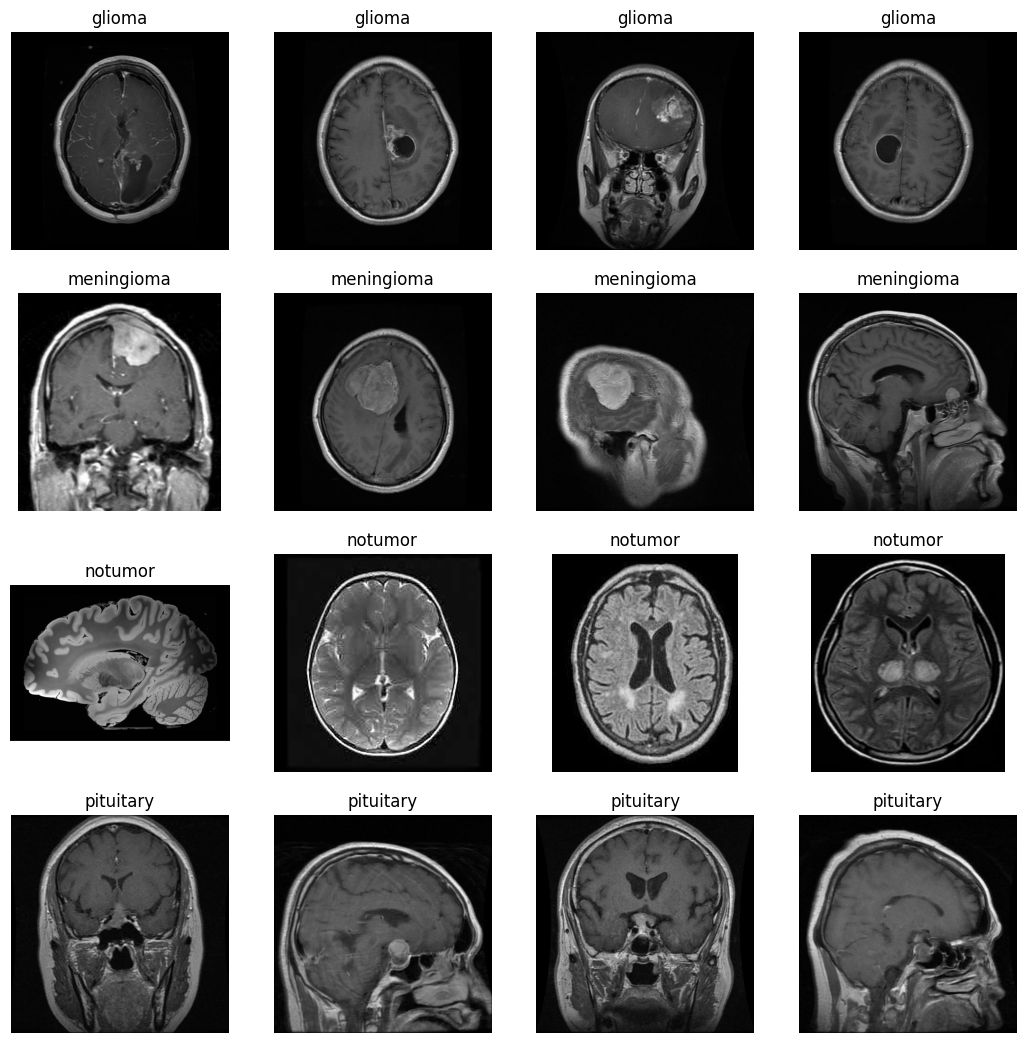

In [7]:
fig = plt.figure(figsize = (13, 13))
row, col = 4, 4
i = 1

for img in rand:
  image = cv2.imread(os.path.join(img))
  fig.add_subplot(row,col, i)
  plt.axis("off")
  plt.title(img.split("/")[3])
  plt.imshow(image)
  i += 1

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_gen = ImageDataGenerator(rescale = 1. /255,
                               zoom_range = 0.15,
                               horizontal_flip = True,
                               vertical_flip = True,
                               fill_mode = 'nearest')

train_dataset = train_gen.flow_from_directory("/content/Training/",
                                              batch_size = 16,
                                              target_size = (150,150),
                                              class_mode = "categorical")

test_gen = ImageDataGenerator(rescale = 1. /255)

test_dataset = test_gen.flow_from_directory("/content/Testing/",
                        batch_size = 16,
                        target_size = (150,150),
                        class_mode = "categorical")

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


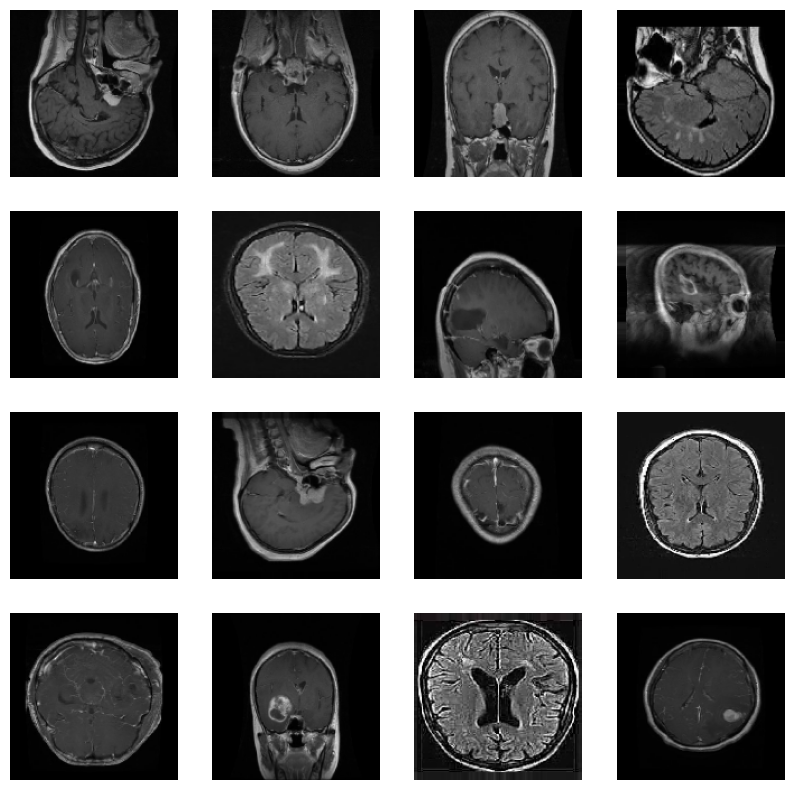

In [11]:
row, col = 4, 4
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(10, 10))
idx = 0

for i in range(row):
    for j in range(col):
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.show()

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models

In [14]:
act = 'relu'

model = models.Sequential([layers.Conv2D(32, (3, 3), activation = act, input_shape = (150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64, (3, 3), activation = act),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(128, (3, 3), activation = act),
                          layers.MaxPooling2D(2,2),
                          layers.Conv2D(128, (3, 3), activation = act),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128, activation = act),
                          layers.Dense(64, activation = act),
                          layers.Dense(4, activation = "softmax")])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [16]:
history = model.fit(train_dataset, epochs = 20)

Epoch 1/20
357/357 [==============================] - 46s 129ms/step - loss: 0.6755 - accuracy: 0.7279
Epoch 2/20
357/357 [==============================] - 47s 131ms/step - loss: 0.5203 - accuracy: 0.8009
Epoch 3/20
357/357 [==============================] - 45s 127ms/step - loss: 0.4184 - accuracy: 0.8435
Epoch 4/20
357/357 [==============================] - 43s 122ms/step - loss: 0.3389 - accuracy: 0.8713
Epoch 5/20
357/357 [==============================] - 41s 116ms/step - loss: 0.3065 - accuracy: 0.8824
Epoch 6/20
357/357 [==============================] - 42s 118ms/step - loss: 0.2524 - accuracy: 0.9051
Epoch 7/20
357/357 [==============================] - 42s 117ms/step - loss: 0.2042 - accuracy: 0.9298
Epoch 8/20
357/357 [==============================] - 46s 127ms/step - loss: 0.1665 - accuracy: 0.9373
Epoch 9/20
357/357 [==============================] - 42s 117ms/step - loss: 0.1676 - accuracy: 0.9407
Epoch 10/20
357/357 [==============================] - 43s 120ms/step - l

In [17]:
model.evaluate(test_dataset, verbose = 2)

82/82 - 3s - loss: 0.2686 - accuracy: 0.9298 - 3s/epoch - 38ms/step


[0.26863181591033936, 0.9298245906829834]

In [18]:
model.evaluate(train_dataset, verbose = 2)

357/357 - 43s - loss: 0.0956 - accuracy: 0.9659 - 43s/epoch - 121ms/step


[0.09564363211393356, 0.9658613204956055]

In [21]:
model.save("/content/drive/My Drive/Models/MedicalDect.h5")

In [22]:
model.save("/content/drive/My Drive/Models/MedicalDect.keras")

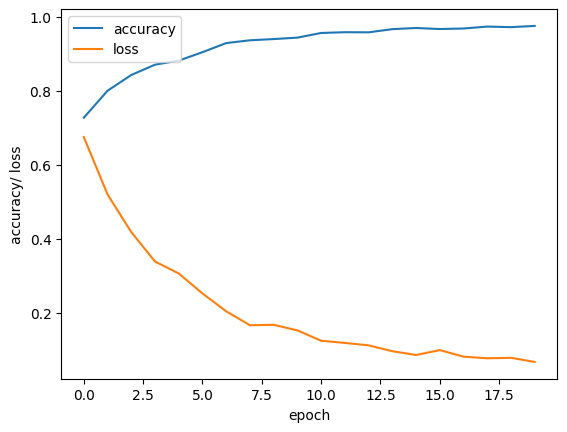

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy/ loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'], loc = 'upper left')
plt.show()

In [25]:
labels = {value: key for key, value in train_dataset.class_indices.items()}
print(labels)
for key, value in labels.items():
  print(f"{key} : {value}")

{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
0 : glioma
1 : meningioma
2 : notumor
3 : pituitary


In [29]:
imgList, labList = [],[]

for img, lab in test_dataset:
  imgList, labList = img, lab
  pred = model.predict(img)
  break

1/1 [==============================] - 0s 25ms/step


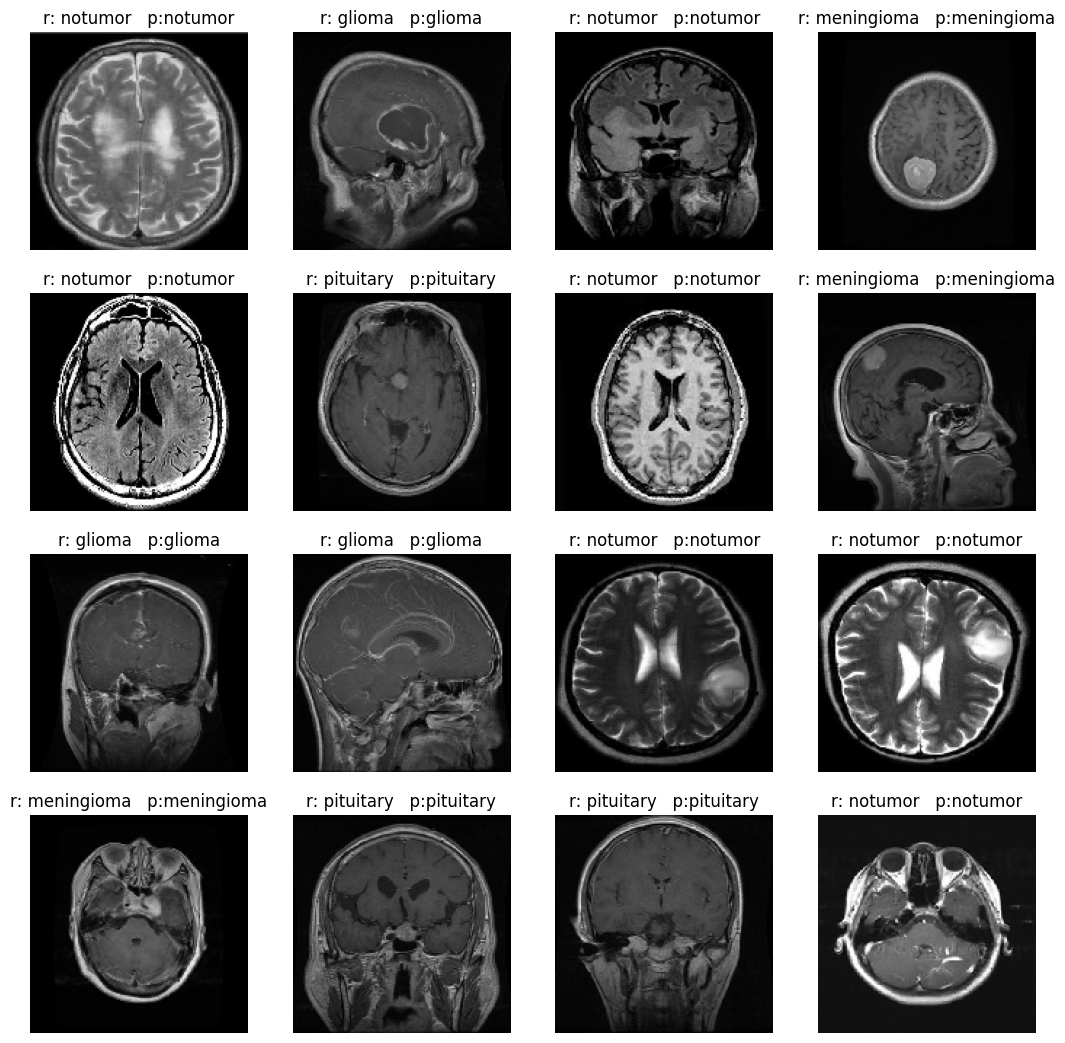

In [30]:

# fig = plt.subplots(figsize = (9,9))
# i = 1
row, col = 4, 4
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(13, 13))
idx = 0
id = 0
for i in range(row):
    for j in range(col):
        ax[i, j].set_title("r: " + labels[np.argmax(labList[id])] + "   p:" + labels[np.argmax(pred[id])])
        ax[i, j].imshow(imgList[id])
        ax[i, j].axis("off")
        idx += 1
        id+=1

plt.show()